# Жиделев Сергей 
# 6 лабораторная работа
# РИ-401002

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py

In [2]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.ones((L, K))
    
    for k in range(L):
        j, m = k, k
        for i in range(j, K+m):
            X[k, i - j] = F[i]

    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T, U)
    
    return (A, U, V)

In [3]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд
A, U, V = SSA_modes(ts, 3) # его разложение с длиной окна = 3
print(A) # собственные числа
print(U) # собственные вектора
print(V) # траекторные вектора

[129.66842566  12.           3.33157434]
[[-5.78869570e-01  7.07106781e-01  4.06091149e-01]
 [-5.74299610e-01  7.09966662e-16 -8.18645196e-01]
 [-5.78869570e-01 -7.07106781e-01  4.06091149e-01]]
[[-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  1.11022302e-15 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  1.11022302e-15 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]]


In [4]:
def SSA_group(A, U, V, N, I):
    L = len(A)
    V = V.transpose()
    K = N - L + 1
    
    Z = np.dot(U[:, I], V[I, :])

    lv = []
    L_min = min(L, K)
    K_max = max(L, K)
    
    for k in range(0, L_min - 1):
        s = 0
        for i in range(k+1):
            s += Z[i, k - i]
        lv.append(round(s/(k+1), 1))

    for k in range(L_min - 1, K_max):
        s = 0
        
        for i in range(L_min):
            s += Z[i, k - i]
        lv.append(round(s/(L_min), 1))

    for k in range(K_max, N):
        s = 0

        for i in range(k - K_max + 1, N - K_max + 1):
            s += Z[i, k - i]
        lv.append(round(s/(N - k), 1))

    return lv

[3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0]


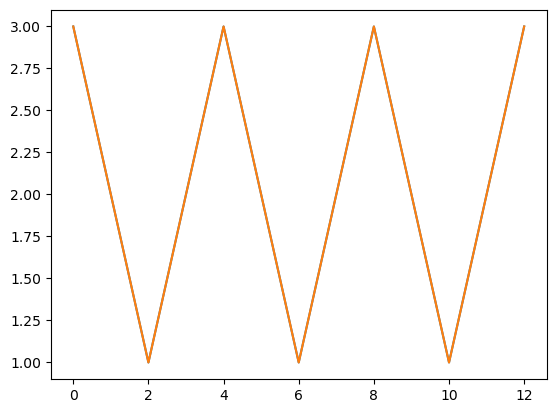

In [5]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1, 2])
print(ts1)
plt.plot(ts)
plt.plot(ts1)

[2.0, 1.8, 1.9, 2.0, 2.1, 2.0, 1.9, 2.0, 2.1, 2.0, 1.9, 1.8, 2.0]


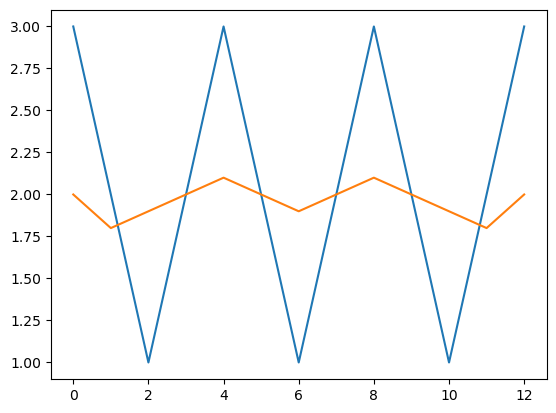

[1.0, 0.0, -0.7, 0.0, 0.7, -0.0, -0.7, 0.0, 0.7, -0.0, -0.7, -0.0, 1.0]


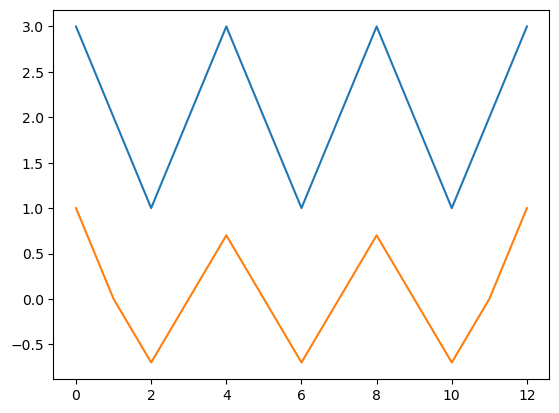

[-0.0, 0.2, -0.2, 0.0, 0.2, 0.0, -0.2, 0.0, 0.2, 0.0, -0.2, 0.2, -0.0]


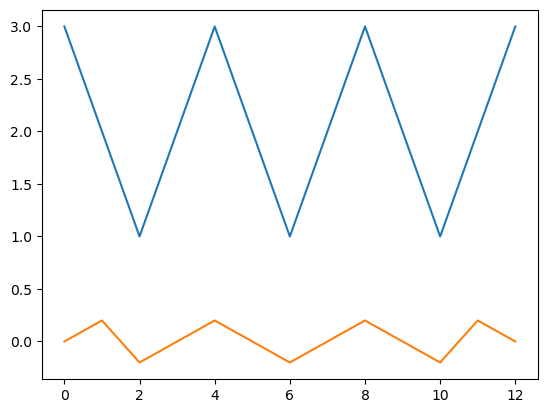

In [6]:
ts1 = SSA_group(A, U, V, len(ts), [0])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()
ts1 = SSA_group(A, U, V, len(ts), [1])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()
ts1 = SSA_group(A, U, V, len(ts), [2])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()

[3.0, 1.8, 1.2, 2.0, 2.8, 2.0, 1.2, 2.0, 2.8, 2.0, 1.2, 1.8, 3.0]


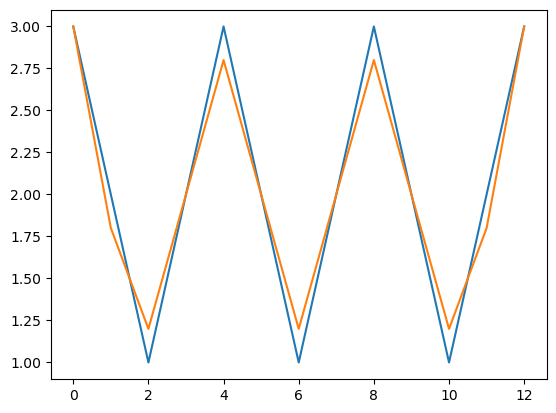

[2.0, 2.0, 1.7, 2.0, 2.3, 2.0, 1.7, 2.0, 2.3, 2.0, 1.7, 2.0, 2.0]


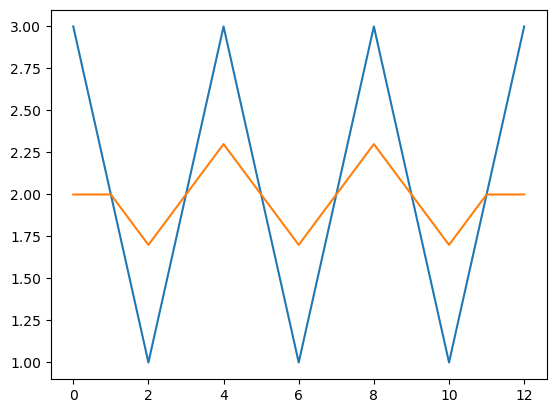

[1.0, 0.2, -0.9, 0.0, 0.9, 0.0, -0.9, 0.0, 0.9, 0.0, -0.9, 0.2, 1.0]


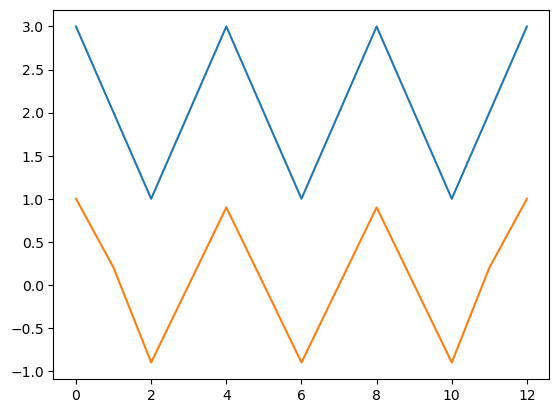

In [7]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()
ts1 = SSA_group(A, U, V, len(ts), [0, 2])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()
ts1 = SSA_group(A, U, V, len(ts), [1, 2])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()

23-24 задание

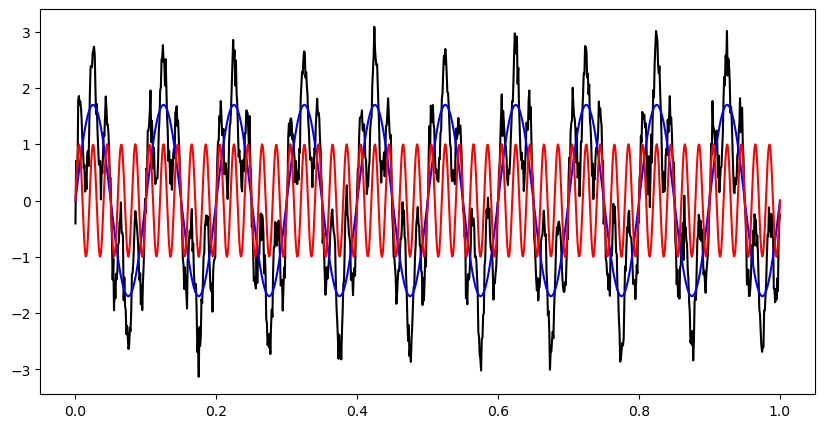

In [8]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

In [9]:
A, U, V = SSA_modes(F, 15)
ts1 = SSA_group(A, U, V, len(F), [1, 2])

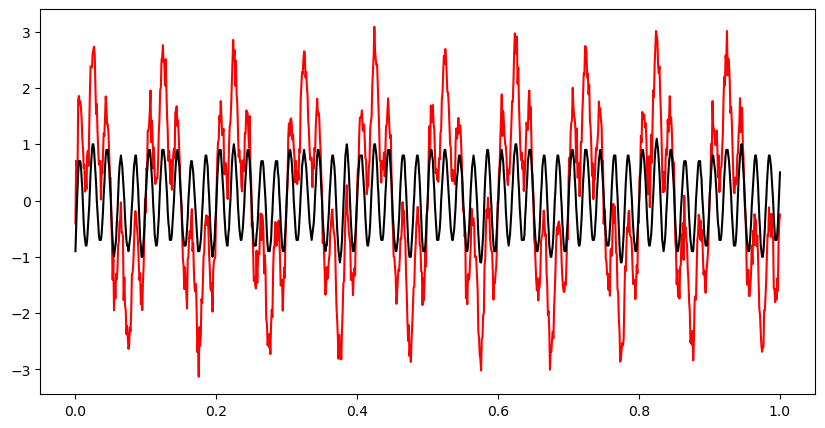

In [10]:
plt.figure(figsize = (10, 5))
plt.plot(t, F, c = 'r')
plt.plot(t, ts1, c = 'k')

In [11]:
A, U, V = SSA_modes(F, 18)
ts1 = SSA_group(A, U, V, len(F), [0])

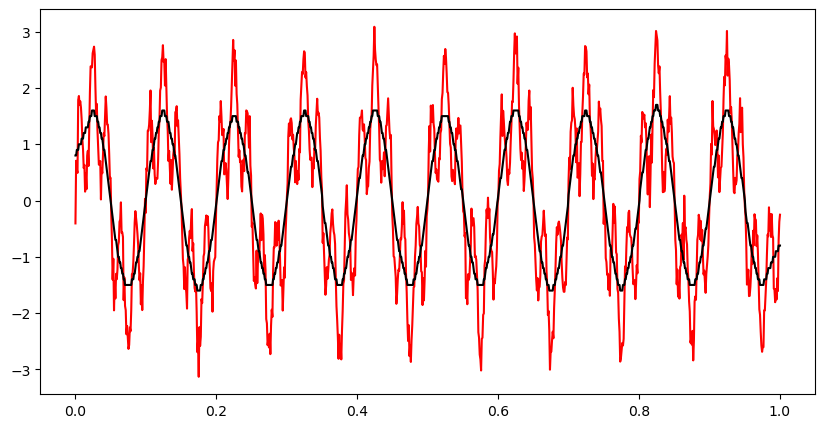

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(t, F, c = 'r')
plt.plot(t, ts1, c = 'k')

25 задание

In [13]:
t = np.linspace(0,4,4096)
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t))

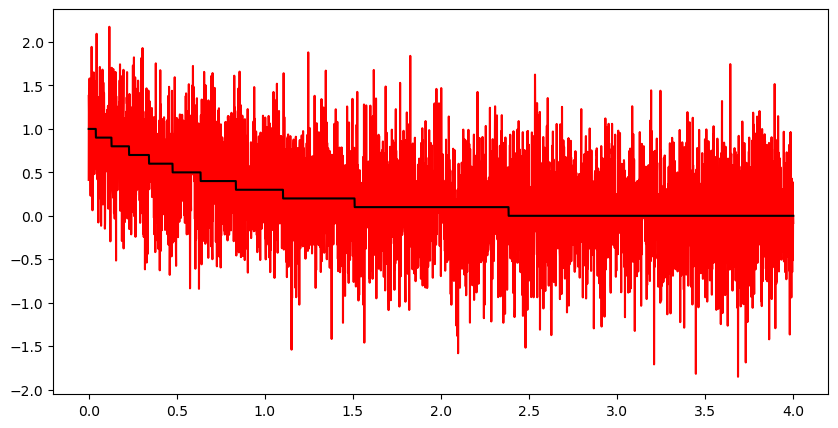

In [14]:
a = np.exp(-0.4*np.pi*t)
A, U, V = SSA_modes(a, 10)
ts1 = SSA_group(A, U, V, len(a), [0])

plt.figure(figsize = (10, 5))
plt.plot(t, F, c = 'r')
plt.plot(t, ts1, c = 'k')

27-28 задание

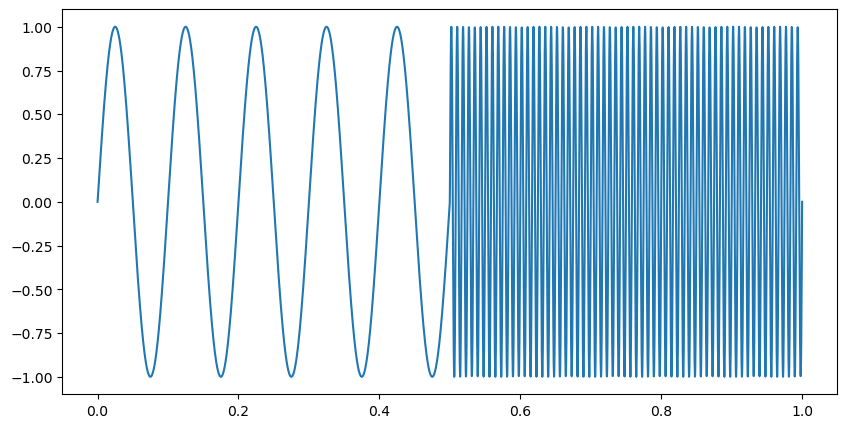

In [15]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
 x2[i] = np.sin(2*np.pi*10*t[i]) 
for i in range(len(t)//2, len(t)):
 x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

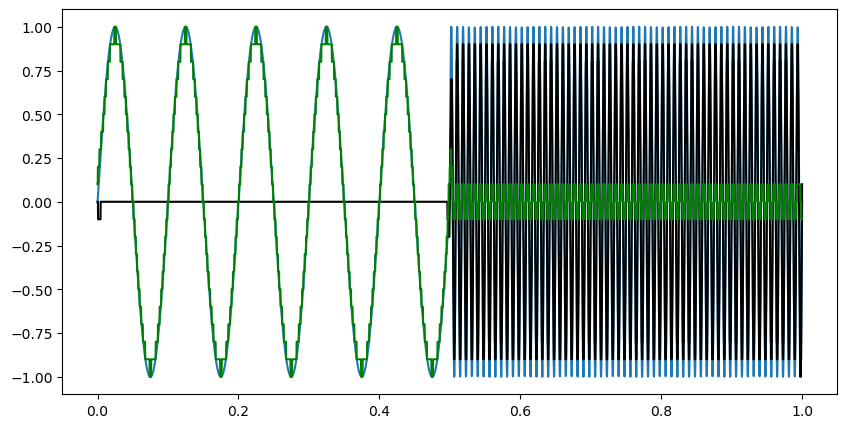

In [16]:
A, U, V = SSA_modes(x2, 28)
ts1 = SSA_group(A, U, V, len(x2), [1, 2])

A, U, V = SSA_modes(x2, 28)
ts2 = SSA_group(A, U, V, len(x2), [0, 5])

plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.plot(t, ts1, c = 'k')
plt.plot(t, ts2, c = 'g')

29 задание

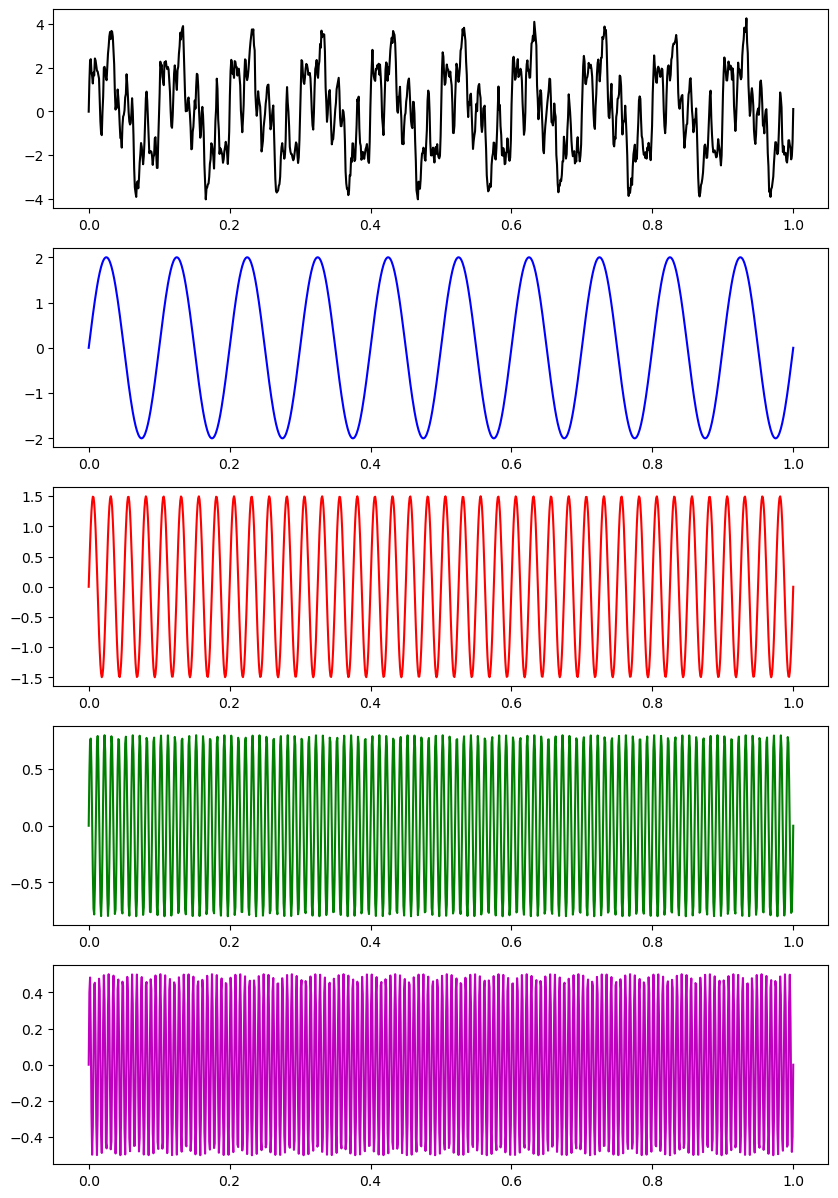

In [17]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi \
                    *f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

In [18]:
F = 2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi \
                    *f3*t)+0.5*np.sin(2*np.pi*f4*t)

A, U, V = SSA_modes(F, 21)
ts1 = SSA_group(A, U, V, len(F), [0])

A, U, V = SSA_modes(F, 21)
ts2 = SSA_group(A, U, V, len(F), [1, 2])

A, U, V = SSA_modes(F, 21)
ts3 = SSA_group(A, U, V, len(F), [3, 4])

A, U, V = SSA_modes(F, 21)
ts4 = SSA_group(A, U, V, len(F), [3])

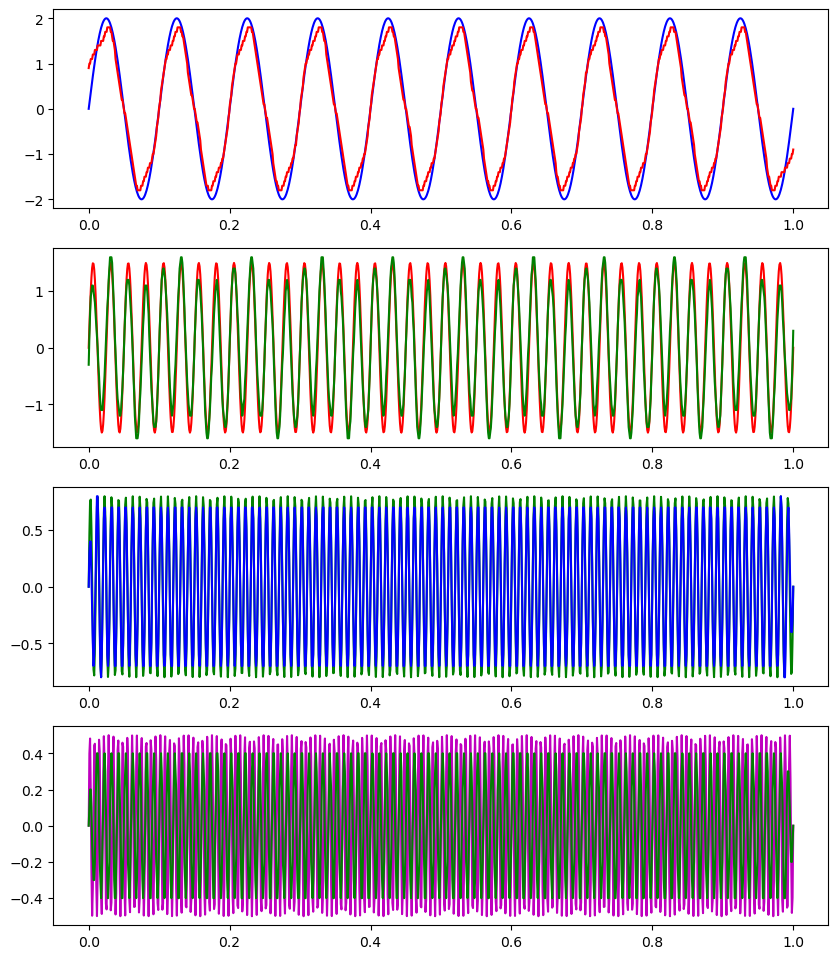

In [19]:
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, ts1, c = 'r')
plt.subplot(5,1,2)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.plot(t, ts2, c = 'g')
plt.subplot(5,1,3)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.plot(t, ts3, c = 'b')
plt.subplot(5,1,4)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.plot(t, ts4, c = 'g')
plt.show()

30 задание

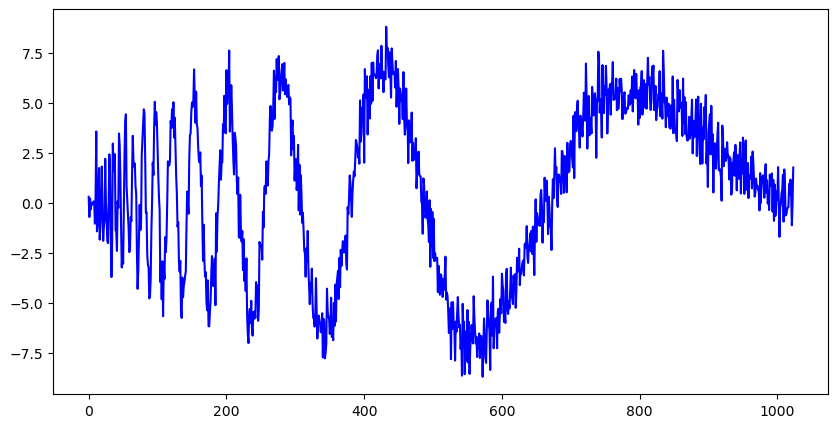

In [20]:
file = h5py.File('Data/doppler.mat','r')
data = file.get('data')
data = np.array(data)
data = data.ravel()
plt.figure(figsize = (10, 5))
plt.plot(data, 'b')
plt.show()

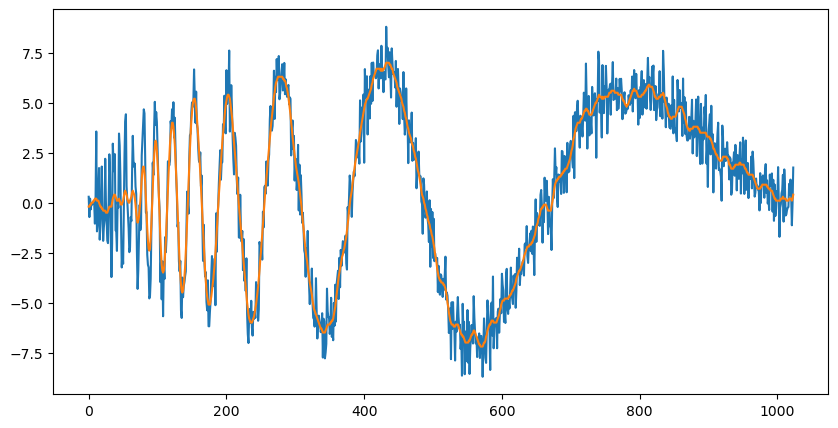

In [21]:
A, U, V = SSA_modes(data, 15)
ts1 = SSA_group(A, U, V, len(data), [0, 1])

plt.figure(figsize = (10, 5))
plt.plot(data)
plt.plot(ts1)

31-35 задание

In [22]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))


def SSA_R(A, U, N, M, I, res):
    vu = np.linalg.norm(U[-1, I])
    L = len(A)
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    # lv = list(F)
        
    for i in range(N, N + M - 1):
        s = 0
        for j in range(L - 1):
            s += R[j]*res[i-j-1]
        res = np.append(res, s)
    
    return res
    


A, U, V = SSA_modes(F, 100)
res = SSA_group(A, U, V, len(F), [0, 1, 2, 3])
otv = SSA_R(A, U, len(F), 256, [0, 1, 2, 3], F)

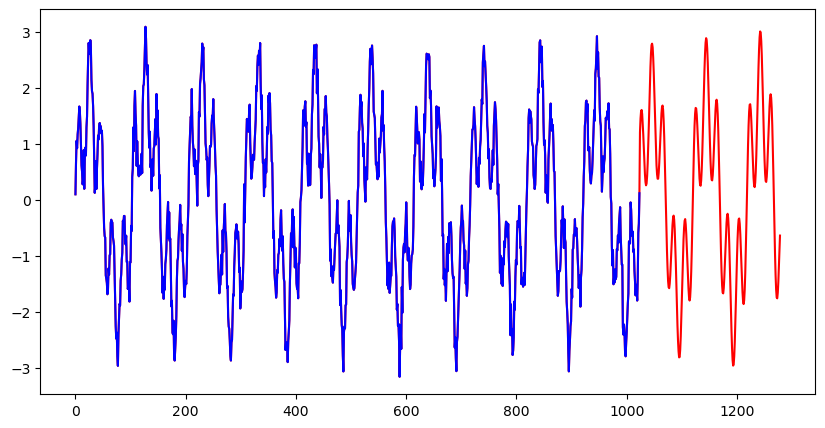

In [23]:
plt.figure(figsize = (10, 5))
plt.plot(otv, c = 'r')
plt.plot(F, c = 'b')

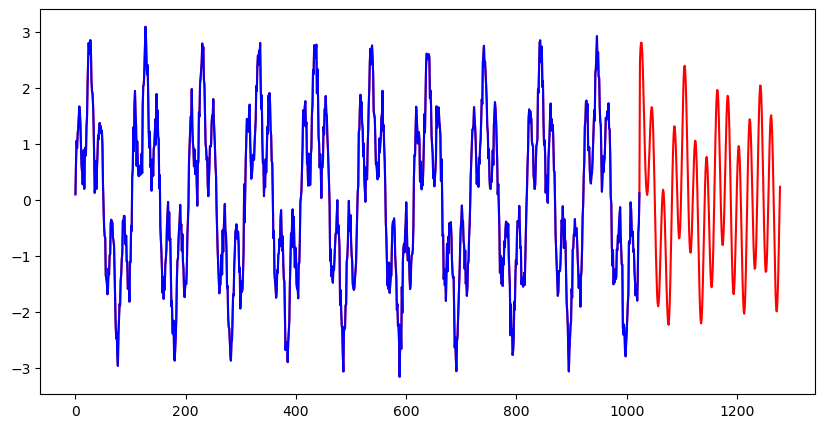

In [24]:
A, U, V = SSA_modes(F, 80)
res = SSA_group(A, U, V, len(F), [0, 1, 2, 3])
otv = SSA_R(A, U, len(F), 256, [0, 1, 2, 3], F)

plt.figure(figsize = (10, 5))
plt.plot(otv, c = 'r')
plt.plot(F, c = 'b')

36 задание

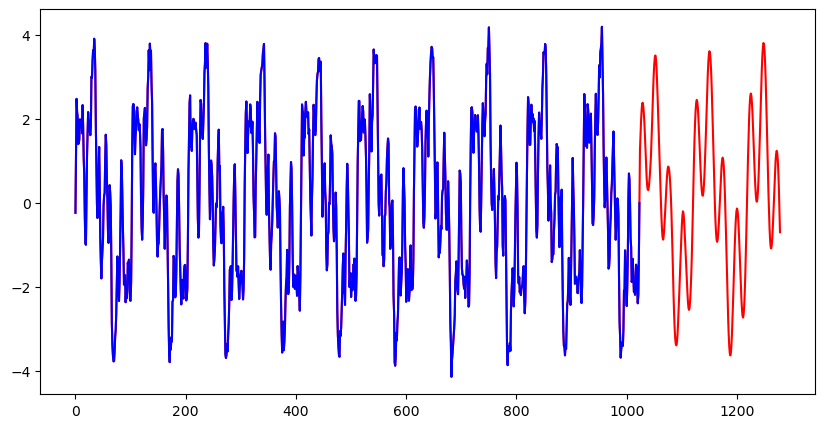

In [25]:
def gen_F(N):
    t = np.linspace(0,1, N)
    f1 = 10
    f2 = 40
    f3 = 100
    f4 = 150
    
    return 2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi \
                        *f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
    

F = gen_F(1024)
A, U, V = SSA_modes(F, 100)
res = SSA_group(A, U, V, len(F), [0, 1, 2, 3])
otv = SSA_R(A, U, len(F), 256, [0, 1, 2, 3], F)

plt.figure(figsize = (10, 5))
plt.plot(otv, c = 'r')
plt.plot(F, c = 'b')

37-38 задание

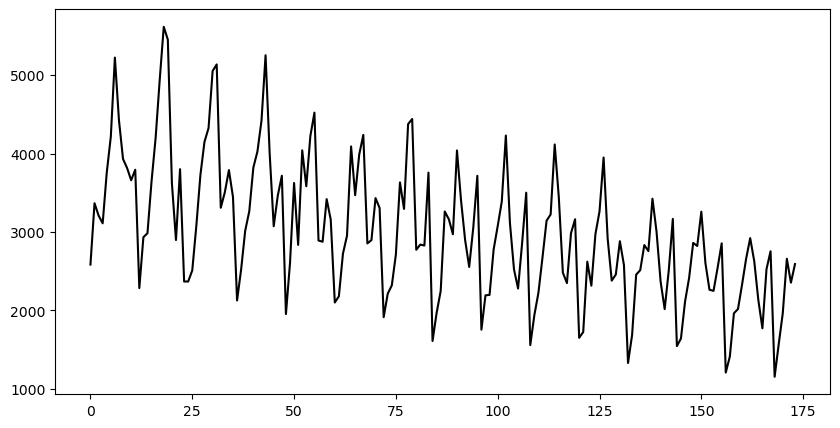

In [26]:
file = h5py.File('Data/Fort.mat','r')
Z = file.get('Fort')
Z = np.array(Z)
Z = Z.ravel()
plt.figure(figsize = (10, 5))
plt.plot(Z, 'k')
plt.show()


In [27]:
def SSA_R(A, U, N, M, I, res):
    vu = np.linalg.norm(U[-1, I])
    L = len(A)
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    # lv = list(F)
        
    for i in range(N, N + M - 1):
        s = 0
        for j in range(L - 1):
            s += R[j]*res[i-j-1]
        res = np.append(res, s)
    
    return res


In [28]:
len(Z)

174

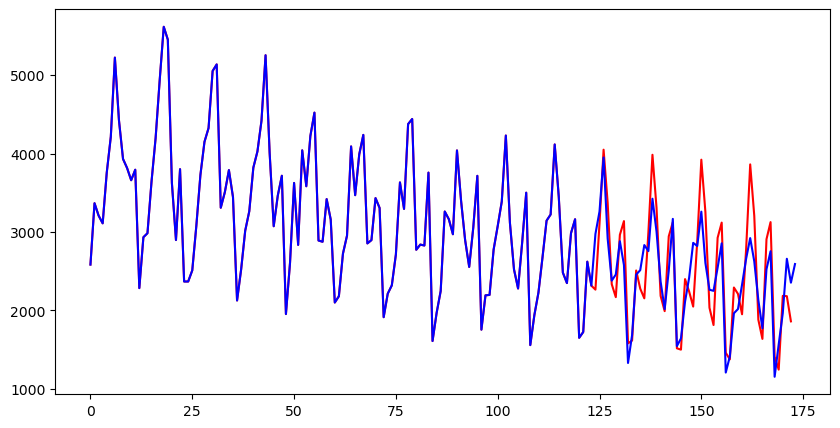

In [29]:
F = Z[:len(Z) - 50]
A, U, V = SSA_modes(Z, 12)
res = SSA_group(A, U, V, len(Z), list(range(11)))
otv = SSA_R(A, U, len(F), 50, list(range(11)), F)


plt.figure(figsize = (10, 5))
plt.plot(otv, c = 'r')
plt.plot(Z, c = 'b')

39 задание

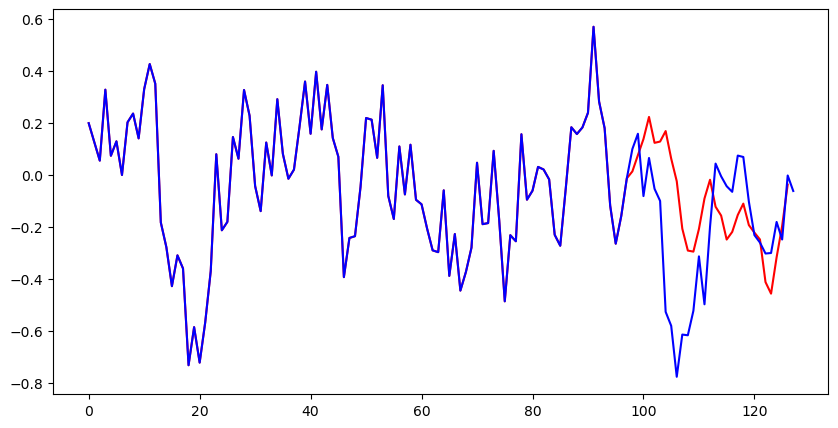

In [69]:
file = h5py.File('Data/10.mat','r')
Z = file.get('z10')
Z = np.array(Z)
Z = Z.ravel()

F = Z[:len(Z) - 30]
A, U, V = SSA_modes(Z, len(F)//2)
I = list(range(14))
res = SSA_group(A, U, V, len(Z), I)
otv = SSA_R(A, U, len(F), 30, I, F)


plt.figure(figsize = (10, 5))
plt.plot(otv, c = 'r')
plt.plot(Z, c = 'b')

40-47 задания

41) Проведем частичный SSA-анализ заданного ВР: без 
диагонального усреднения (последний этап)
42) .4342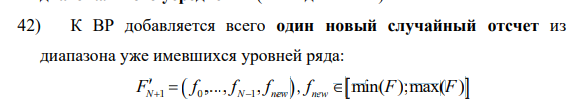 44 
43) Этот ряд длины N+1 подвергается SSA-декомпозиции (только
шаги разложения и формирования траекторной матрицы), но без 
изменения оценки параметров, то есть только на основе их
предыдущи45оценок.
44) Полученные собственные тройки нового ряда группируются и 
усредняются на основе метода гру46ировки I.
45) В результате усреднения будет получен новый временной ряд, 
для которого первые N отсчетов совпадают с ВР, а последний отсчет 
является п47д-прогнозом.
46) Для получения точного прогноза, новый отсчет ряда 
приравнивается этому приближению, после чего предыдущие шаги 
повторяются до тех пор, пока значение не перестанет изменяться с 
увелич48ием числа шагов.
47) Полученный в результате отсчет принимается за первую точку 
прогноза. Для продолжения прогноза, новый ряд длины N+1 
становится ВР для прогнозирования, и алгоритм повторяется вновь.
На протяжении всего алгоритма прогноза нет необходимости заново 
искать необходимую группировку компонент.

In [31]:
def SSA_group(A, U, V, N, I):
    L = len(A)
    V = V.transpose()
    K = N - L + 1
    
    Z = np.dot(U[:, I], V[I, :])

    lv = []
    L_min = min(L, K)
    K_max = max(L, K)
    
    for k in range(0, L_min - 1):
        s = 0
        for i in range(k+1):
            s += Z[i, k - i]
        lv.append(round(s/(k+1), 1))

    for k in range(L_min - 1, K_max):
        s = 0
        
        for i in range(L_min):
            s += Z[i, k - i]
        lv.append(round(s/(L_min), 1))

    for k in range(K_max, N):
        s = 0

        for i in range(k - K_max + 1, N - K_max + 1):
            s += Z[i, k - i]
        lv.append(round(s/(N - k), 1))

    return lv 

In [32]:
def SSA_stoh(F, N, I):
   A, U, V = SSA_modes(F, 50)
   #print("1", F[len(F)-1])
   N=len(F)
   L = len(A)
   K=N-L+1
   V = V.transpose()
   Z = np.dot(U[:, I], V[I, :])
   G = np.zeros(N)
   L1 = min(L, K)
   K1 = max(L, K)
   g=[]
   for i in range(0, N):
    if 0<=i<L1-1:
      sum=0
      for k in range(i+1):
        sum+=Z[k, i-k]
      g.append((1/(i+1))*sum)
    if L1-1<=i<K1:
      sum=0
      for k in range(L1-1+1):
        sum+=Z[k, i-k]
      g.append((1/L1)*sum)
    if K1<=i<N+1:
      sum=0
      for k in range(i-K1+1, N-K1+1):
        sum+=Z[k, i-k]
      g.append((1/(N-i))*sum)
   return g


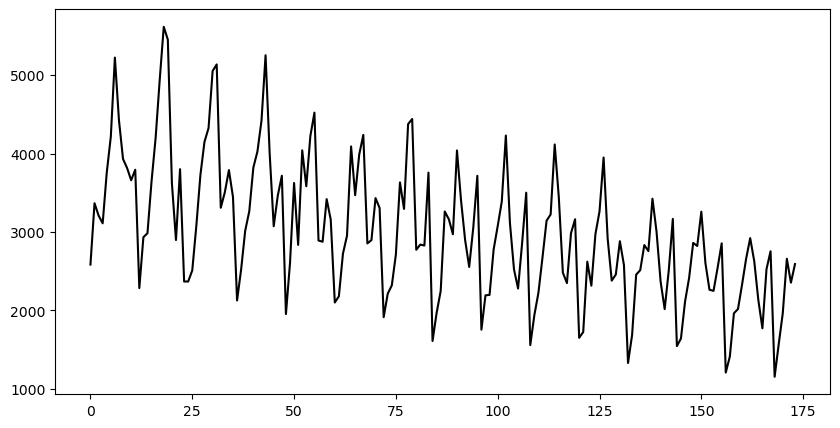

In [33]:
file = h5py.File('Data/Fort.mat','r')
Z = file.get('Fort')
Z = np.array(Z)
Z = Z.ravel()
plt.figure(figsize = (10, 5))
plt.plot(Z, 'k')
plt.show()

Z_train=Z[0:123]

In [34]:
# import random as rd

# F=Z[:len(Z) - 50]
# L = 50
# l = 4
# lv = []
# F1 = F.copy()

# for i in range(50):
#     if i==0:
#         F_new=rd.uniform(min(F), max(F))
#         F1=np.append(F, F_new)
#         A, U, V = SSA_modes(F1, L)
#         F1=SSA_group(A, U, V, len(F1), [i for i in range(0, l)])
#         lv.append(F1[-1])
        
#     else:
#         A, U, V = SSA_modes(F1, L)
#         F2=SSA_group(A, U, V, len(F1), [i for i in range(0, l)])
        
#         while np.abs(F2[-1] - F1[-1]) > 0.01:
#             F1[-1] = F2[-1]
#             A, U, V = SSA_modes(F1, L)
#             F2=SSA_group(A, U, V, len(F1), [i for i in range(0, l)])

#         lv.append(F2[-1])
        
#         else:
#             F_new=rd.uniform(min(F), max(F))
#             F1=np.append(F, F_new)
#             A, U, V = SSA_modes(F1, L)
#             F1=SSA_group(A, U, V, len(F1), [i for i in range(0, l)])




# print(len(lv))
# F = np.append(F, lv)
# plt.figure(figsize = (15, 5))
# plt.plot(F, 'r')
# plt.plot(Z, 'k')

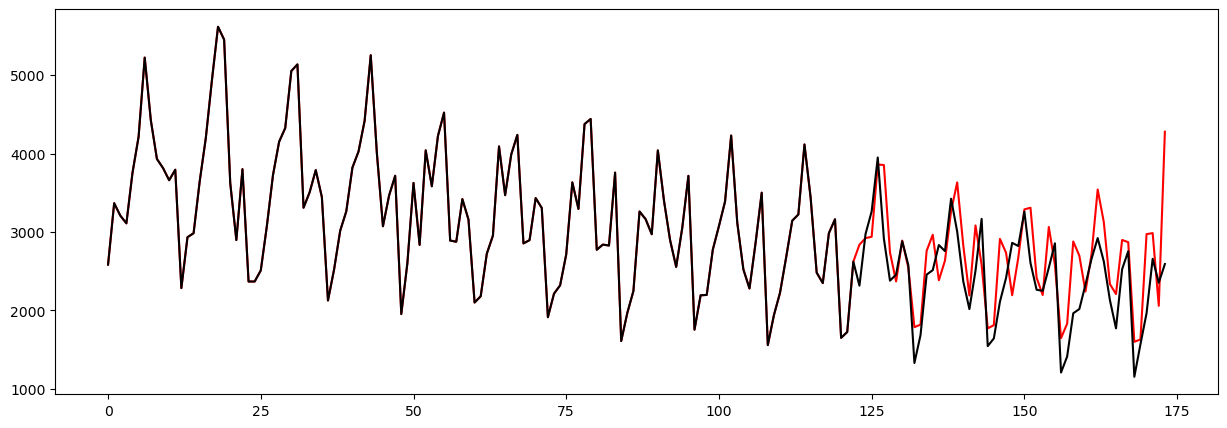

In [37]:
import random as rd
F=Z_train
k=0
l=4
while k<=50:
  if k==0:
    F_new=rd.uniform(min(F), max(F))
    F=np.append(F, F_new)
    F1=SSA_stoh(F, len(F), [i for i in range(0, l)])
    k+=1
  else:
    F2=SSA_stoh(F, len(F), [i for i in range(0, l)])
    if abs(F1[-1])-abs(F2[-1])>0.001:
      F1[-1]=F2[-1]
      F2=SSA_stoh(F1, len(F), [i for i in range(0, l)])
    else:
      F[-1]=F2[-1]
      F_new=rd.uniform(min(F), max(F))
      F=np.append(F, F_new)
      F1=SSA_stoh(F, len(F), [i for i in range(0, l)])
      k+=1


plt.figure(figsize = (15, 5))
plt.plot(F, 'r')
plt.plot(Z, 'k')